# CHESSMAN IMAGE CLASSIFICATION

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /content/Chessman-image-dataset.zip

--2023-11-23 07:28:23--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-11-23 07:28:24--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/content/Chessman-image-dataset.zip’

/content/Chessman-i 100%[===================>]  57.87M   157MB/s   

In [ ]:
import os, zipfile
local_zip = '/content/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
len_pawn = len(os.listdir('/content/Chessman-image-dataset/Chess/Pawn/'))
len_bishop = len(os.listdir('/content/Chessman-image-dataset/Chess/Bishop/'))
len_king = len(os.listdir('/content/Chessman-image-dataset/Chess/King/'))
len_knight = len(os.listdir('/content/Chessman-image-dataset/Chess/Knight/'))
len_queen = len(os.listdir('/content/Chessman-image-dataset/Chess/Queen/'))
len_rook = len(os.listdir('/content/Chessman-image-dataset/Chess/Rook/'))

print('pawn:', len_pawn)
print('bishop:', len_bishop)
print('king:', len_king)
print('knight:', len_knight)
print('queen:', len_queen)
print('rook:', len_rook)

print('Overall image:', len_pawn + len_bishop + len_king
      + len_knight + len_queen + len_rook)

pawn: 107
bishop: 87
king: 76
knight: 106
queen: 78
rook: 102
Overall image: 556


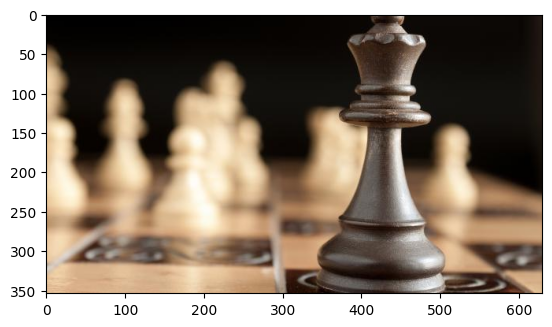

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = image.load_img('/content/Chessman-image-dataset/Chess/Queen/00000084.jpeg')
imgplot = plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = os.path.join('/content/Chessman-image-dataset/Chess')
data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1,
)

In [ ]:
train = data.flow_from_directory(
    data_dir,
    target_size = (150, 150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training')

validation = data.flow_from_directory(
    data_dir,
    target_size = (150, 150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
hist = model.fit(
    train,
    validation_data = validation,
    epochs = 50,
    verbose = 2
)

Epoch 1/50
63/63 - 23s - loss: 10.0355 - accuracy: 0.4369 - val_loss: 1.4285 - val_accuracy: 0.6154 - 23s/epoch - 372ms/step
Epoch 2/50
63/63 - 9s - loss: 1.4977 - accuracy: 0.6994 - val_loss: 1.8558 - val_accuracy: 0.6154 - 9s/epoch - 145ms/step
Epoch 3/50
63/63 - 9s - loss: 1.1442 - accuracy: 0.7154 - val_loss: 1.7086 - val_accuracy: 0.6538 - 9s/epoch - 143ms/step
Epoch 4/50
63/63 - 8s - loss: 1.3304 - accuracy: 0.7415 - val_loss: 2.4346 - val_accuracy: 0.6154 - 8s/epoch - 123ms/step
Epoch 5/50
63/63 - 10s - loss: 0.9080 - accuracy: 0.7956 - val_loss: 0.8038 - val_accuracy: 0.7885 - 10s/epoch - 154ms/step
Epoch 6/50
63/63 - 9s - loss: 0.7389 - accuracy: 0.8437 - val_loss: 1.2194 - val_accuracy: 0.7308 - 9s/epoch - 135ms/step
Epoch 7/50
63/63 - 8s - loss: 0.7318 - accuracy: 0.8597 - val_loss: 0.9911 - val_accuracy: 0.7500 - 8s/epoch - 134ms/step
Epoch 8/50
63/63 - 10s - loss: 0.5958 - accuracy: 0.8717 - val_loss: 1.6682 - val_accuracy: 0.6538 - 10s/epoch - 152ms/step
Epoch 9/50
63/63 

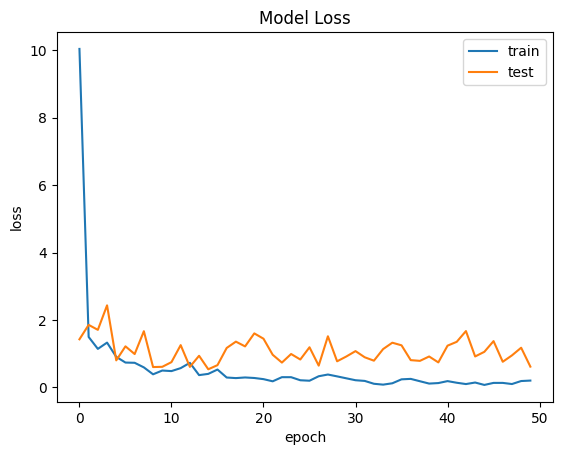

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

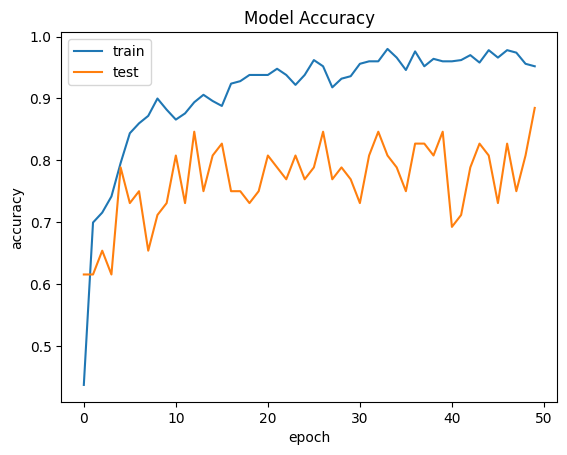

In [ ]:
plt.plot(hist_transfer.history['accuracy'])
plt.plot(hist_transfer.history['val_accuracy'])
plt.title('Model Accuracy'),
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()